In [1]:
import numpy as np
import pickle as pcl

from scipy.stats import binned_statistic
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)

import matplotlib.gridspec as gridspec

# def percentile(x, y, binLimits, p):
#     perc, dummy, dummy = binned_statistic(x, y, statistic=lambda y: np.percentile(y, p), bins=binLimits)
#     return perc

from predict import predict

Using TensorFlow backend.


In [2]:
si = predict(fname='data/full_histories_illustris.h5')
si.training_mask()
si.filename

'data/full_histories_illustris.h5'

In [3]:
se = predict(fname='data/full_histories_eagle.h5')
se.training_mask()

In [4]:
illustris_sfr = si.load_arr('SFR 100Myr','Subhalos')
illustris_mstar = 10**si.load_arr('Stellar Mass 30kpc','Subhalos')
illustris_sfgm = si.load_arr('Star Forming Gas Mass','Subhalos')
illustris_gmet = si.load_arr('Gas Metallicity','Subhalos')

eagle_sfr = se.load_arr('SFR 100Myr','Subhalos')
eagle_mstar = se.load_arr('Stellar Mass 30kpc','Subhalos')

eagle_sfr[(eagle_sfr == 0.,)] = 5e-3
illustris_sfr[(illustris_sfr == 0.,)] = 5e-3

### $M_{*} - \mathrm{SFR}$ distribution

[10.1 10.3 10.5 10.7 10.9 11.1 11.3] [10.  10.2 10.4 10.6 10.8 11.  11.2 11.4]


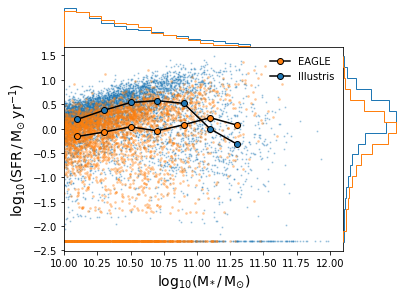

In [5]:
binLimits = np.linspace(10, 11.4, 8)
bins = np.linspace(10.1, 11.3, 7)
print(bins, binLimits)

sfr_bins = np.linspace(-2.0, 1.5, 18)

fig = plt.figure(figsize=(6, 4.5))

gs = gridspec.GridSpec(6, 6)
gs.update(hspace=0, wspace=0)

ax2 = plt.subplot(gs[1:6, 0:5])
ax4 = plt.subplot(gs[1:6, 5])
ax3 = plt.subplot(gs[0, 0:5])

ax4.hist(np.log10(illustris_sfr), orientation='horizontal', 
         bins=sfr_bins, alpha=1.0, color='C0', density=True, histtype='step')

ax4.hist(np.log10(eagle_sfr), orientation='horizontal', 
         bins=sfr_bins, alpha=1.0, color='C1', density=True, histtype='step')

mstar_bins = np.linspace(10, 11.4, 16)
ax3.hist(np.log10(illustris_mstar), bins=mstar_bins, alpha=1.0, 
         color='C0', density=True, histtype='step')

ax3.hist(np.log10(eagle_mstar), bins=mstar_bins, alpha=1.0, 
         color='C1', density=True, histtype='step')


# ax1.axis('off')
ax4.axis('off')
ax3.axis('off')

medi, dummy, dummy = binned_statistic(tuple(np.log10(eagle_mstar)), tuple(np.log10(eagle_sfr)), 
                                      statistic=np.median, bins=binLimits)

perc, dummy, dummy = binned_statistic(np.log10(eagle_mstar), np.log10(eagle_sfr), 
    statistic=np.std, bins=binLimits)

ax2.errorbar(bins, medi, fmt='o-', label='EAGLE', alpha=1.0, c='black',
            fillstyle='full', markerfacecolor='C1', capsize=10) # yerr=perc,

medi, dummy, dummy = binned_statistic(np.log10(illustris_mstar), np.log10(illustris_sfr), 
    statistic=np.median, bins=binLimits)

perc, dummy, dummy = binned_statistic(np.log10(illustris_mstar), np.log10(illustris_sfr), 
    statistic=np.std, bins=binLimits)

ax2.errorbar(bins, medi, fmt='o-', label='Illustris', alpha=1.0, c='black',
            fillstyle='full', markerfacecolor='C0', capsize=10) # yerr=perc, 


ax2.scatter(np.log10(illustris_mstar), np.log10(illustris_sfr), s=1, alpha=0.3, c='C0')
ax2.scatter(np.log10(eagle_mstar), np.log10(eagle_sfr), s=3, alpha=0.3, c='C1')

ax2.set_xlabel('$\mathrm{log_{10}(M_{*} \,/\, M_{\odot})}$', size=14)
ax2.set_ylabel('$\mathrm{log_{10}(SFR \,/\, M_{\odot} \, yr^{-1})}$', size=14)

ax2.legend(frameon=False)

for ax in [ax2,ax3]:
    ax.set_xlim(10,12.1);

# fig.savefig('plots/mstar_sfr_sim_comparison.png', dpi=250, bbox_inches='tight')

## Colour distribution

In [6]:
eagle_intr, wl = se.load_spectra('Intrinsic')
eagle_dust, wl = se.load_spectra('Dust')

eagle_g_intr = se.calculate_photometry(eagle_intr, wl, 'SDSS_g')
eagle_r_intr = se.calculate_photometry(eagle_intr, wl, 'SDSS_r')

eagle_g_dust = se.calculate_photometry(eagle_dust, wl, 'SDSS_g')
eagle_r_dust = se.calculate_photometry(eagle_dust, wl, 'SDSS_r')

In [7]:
illustris_intr, wl = si.load_spectra('Intrinsic')
illustris_dust, wl = si.load_spectra('Dust')

illustris_g_intr = si.calculate_photometry(illustris_intr, wl, 'SDSS_g')
illustris_r_intr = si.calculate_photometry(illustris_intr, wl, 'SDSS_r')

illustris_g_dust = si.calculate_photometry(illustris_dust, wl, 'SDSS_g')
illustris_r_dust = si.calculate_photometry(illustris_dust, wl, 'SDSS_r')

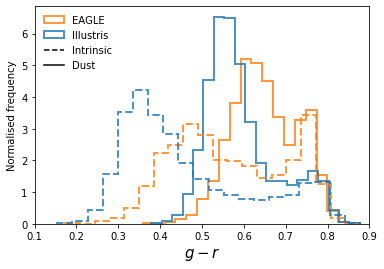

In [8]:
fig, ax = plt.subplots(1,1)

dummy, dummy, e_line = ax.hist(eagle_g_dust - eagle_r_dust, histtype='step', bins=20, label='EAGLE', 
                                density=True, color='C1', lw=2, alpha=0.8);

dummy, dummy, i_line = ax.hist(illustris_g_dust - illustris_r_dust, histtype='step', bins=20, 
                                label='Illustris', density=True, color='C0', lw=2, alpha=0.8);

ax.hist(eagle_g_intr - eagle_r_intr, histtype='step', bins=20, label='EAGLE (intrinsic)', 
            density=True, ls='dashed', color='C1', lw=2, alpha=0.8);

ax.hist(illustris_g_intr - illustris_r_intr, histtype='step', bins=20, 
        label='Illustris (intrinsic)', density=True, ls='dashed', color='C0', lw=2, alpha=0.8);

# dummy, dummy, c_line = ax.hist(np.hstack([illustris_g_dust, eagle_g_dust]) -\
#                                np.hstack([illustris_r_dust, eagle_r_dust]),
#             histtype='step', bins=20, label='EAGLE + Illustris', normed=True, color='C2', lw=2, alpha=0.8);

ax.set_xlabel('$g - r$', size=15)
ax.set_ylabel('Normalised frequency')

ax.set_xlim(0.1,0.9)

from matplotlib.lines import Line2D
train_line = Line2D([0],[0],color='black', linestyle='dashed')
test_line = Line2D([0],[0],color='black', linestyle='solid')
ax.legend([e_line[0], i_line[0], train_line, test_line], 
           ['EAGLE', 'Illustris', 'Intrinsic', 'Dust'], frameon=False)

# plt.savefig('plots/g_r_distribution.png', dpi=250, bbox_inches='tight')

## Plot spectra

/research/astro/highz/Students/Chris/Learning_SFHs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


Text(0.3, 0.85, 'g')

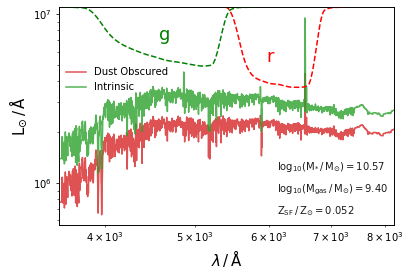

In [9]:
fig, ax = plt.subplots(1,1)

i = 15
# ax.semilogx(sp.grid[0.0]['wavelength'], sp.galaxies[idx]['Spectra']['Screen'], 
#             label='Fixed Screen', alpha=0.5)

# spec = 'Rebinned Dust %s'%sps
ax.plot(wl, illustris_dust[i], label='Dust Obscured', alpha=0.8, c='C3')
# ax.plot(sp.spectra[spec]['lambda'], sp.galaxies[idx]['Spectra']["Noisified %s"%spec], 
#         alpha=0.2, c='grey')

# spec = 'Rebinned Intrinsic %s'%sps
ax.loglog(wl, illustris_intr[i], label='Intrinsic', alpha=0.8, c='C2')

ax2 = ax.twinx()
ax2.invert_yaxis()
f = 1.5
ax2.plot(np.array(si.filters['SDSS_g'].wavelength), si.filters['SDSS_g'].transmit * f, 
         color='green', ls='dashed')

ax2.plot(np.array(si.filters['SDSS_r'].wavelength), si.filters['SDSS_r'].transmit * f, 
         color='red', ls='dashed')

ax.legend(frameon=False, loc=(0.01,0.59))

ax.set_ylim(0, 1.1e7)
ax.set_xlim(wl.min(), wl.max())

ax.set_xlabel('$\lambda \,/\, \mathrm{\AA}$', size=15)
ax.set_ylabel('$\mathrm{L_{\odot} \,/\, \AA}$', size=15)

ax.text(0.65, 0.25, '$\mathrm{log_{10}(M_{*}\,/\, M_{\odot})} = %.2f$'%\
        np.log10(illustris_mstar[i]), transform=ax.transAxes, size=10, alpha=0.9)

ax.text(0.65, 0.15, '$\mathrm{log_{10}(M_{gas}\,/\, M_{\odot})} = %.2f$'%\
        np.log10(illustris_sfgm[i]), transform=ax.transAxes, size=10, alpha=0.9)

ax.text(0.65, 0.05, '$\mathrm{Z_{SF}\,/\, Z_{\odot}} = %.3f$'%\
        illustris_gmet[i], transform=ax.transAxes, size=10, alpha=0.9)

ax2.set_ylim(2, 0)
ax2.set_yticks([])

ax2.text(0.62,0.75,'r', transform=ax.transAxes, size=18, color='red')
ax2.text(0.3,0.85,'g', transform=ax.transAxes, size=18, color='green')

# fig.savefig('plots/example_spectra_A.png', dpi=200, bbox_inches='tight')

## Illustris Attenuation

In [10]:
lambda_nu = 5500
wl_resampled = np.loadtxt('data/wavelength_grid.txt')
lambda_nu_arg = np.argmin(np.abs(wl_resampled - lambda_nu))

eagle_attenuation = [- np.log(eagle_dust[i][lambda_nu_arg] / eagle_intr[i][lambda_nu_arg]) \
               for i in np.arange(len(eagle_dust))]

illustris_attenuation = [- np.log(illustris_dust[i][lambda_nu_arg] / illustris_intr[i][lambda_nu_arg]) \
               for i in np.arange(len(illustris_dust))]

(10, 12.09038180997014)

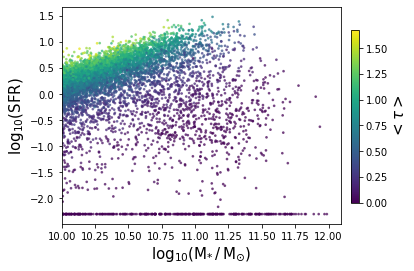

In [11]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

mapp = ax.scatter(np.log10(illustris_mstar), np.log10(illustris_sfr), 
                  c=illustris_attenuation, s=3, alpha=0.6)

cax = fig.add_axes([0.93, 0.2, 0.02, 0.6])
cb = fig.colorbar(mapp, cax=cax, orientation='vertical')
cb.set_label(label='$< \\tau >$', size=15)

cb.set_alpha(1)
cb.draw_all()

ax.set_ylabel('$\mathrm{log_{10}(SFR)}$', size=15)
ax.set_xlabel('$\mathrm{log_{10}(M_{*} \,/\, M_{\odot})}$', size=15)

ax.set_xlim(10,)

# fig.savefig('plots/attenuation_illustris.png', dpi=250, bbox_inches='tight')